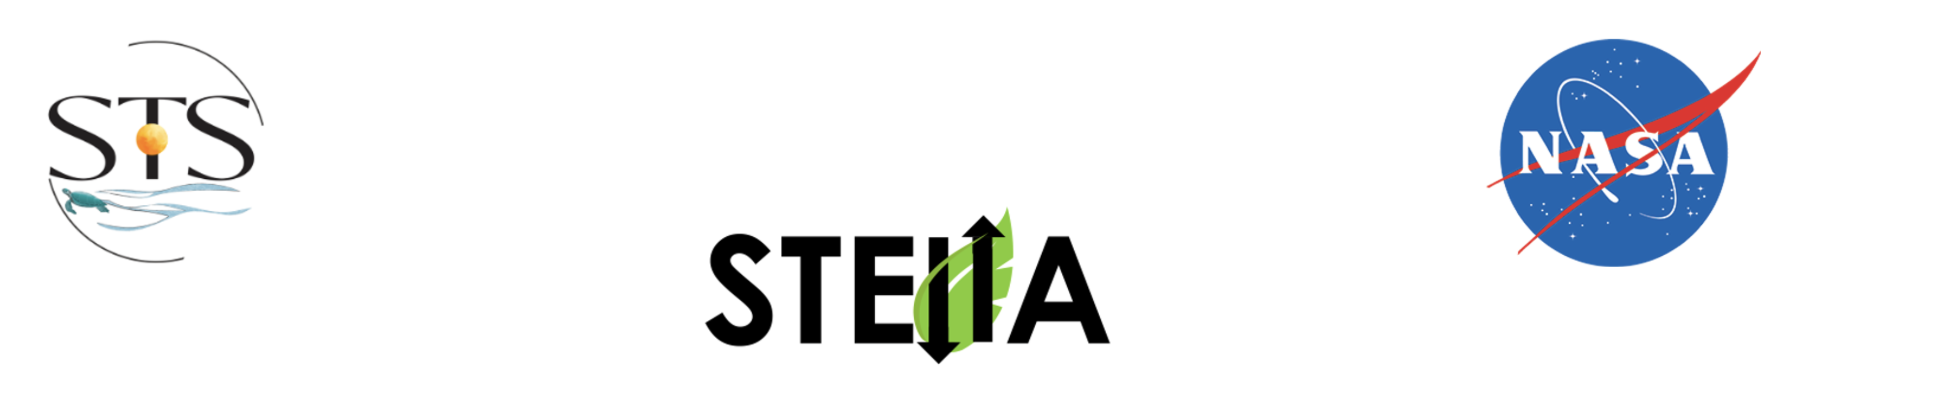


# Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer

The **Science and Technology Society (STS) of Sarasota-Manatee Counties, Florida** is working with the NASA STELLA (Science and Technology Education for Land/Life Assessment) outreach program as a part of our STEM initiative. According to their site, 

- "NASA STELLA instruments are portable low-cost do-it-yourself (DIY) instruments that support science education, and outreach through scientific engagement, inquiry, and discovery while helping you understand Landsat better". 

**STELLA instruments are developed under the influence and inspiration of Landsat.** This alignment not only fulfills our project needs but also serves as a compelling addition to our STEAM initiatives:

1) To train the minds young Floridians to be more aware of our wetlands, to care for them and about them.  Our program will bring more community publicity to the issue of wetlands change, as well.

2) To expose our middle- and high- school aged students to real science, using real data.  That means how to use instrumentation and understand how the data is collected, and how the data can be used in the real world.  It means not only to create beautiful charts and images that form the good results, but also to understand that data must be collected in a proper and reproducible way, that there physics reasons for lack of accuracy and lack of precision that one must understand and minimize in order to achieve meaningful results.


The NASA STELLA-Q2 is capable of making 18 different spectral measurements from the violet/blue portions of the electromagnetic spectrum out to near infrared regions (beyond our range of vision).The following figure **(1)** shows the visible spectrum by wavelength, and the yellow box indicates the STELLA-Q2 frequency range. 

>![image](Spectrum.png)


More can be found on the STELLA DIY instruments at the following link.

>https://landsat.gsfc.nasa.gov/stella/

The following is a sample-by-sample animation of the type of data acquired from STELLA-Q2 Spectrometer built by STS. STS is providing the python code in a Jupyter Notebook that can be used as an example of how to display the data from the STELLA-Q2 device. We have also provided some sample data to be used with this notebook. It should be noted that we did change the name of some of the headers created from our instrument to add colors to each of the wavelength reading that are made in order to display each wavelength as a corresponding color. The near infrared wavelength readings are colored in grays, wheat and gold where the normal visible spectrum colors are in vivid colors that they represent. 

>
>![image](STELLA_color.gif)
>
---


### Load Python requirments:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import ipywidgets as widgets
from IPython.display import display

#import altair as alt
####import panel as pn
#pn.extension('vega')
#pn.extension('tabulator')
#####pn.extension(sizing_mode = 'stretch_width')
#######alt.data_transformers.disable_max_rows()

---
---

# Test 2: Backyard Grass and Shoreline (at end of data) in continous mode of recording.

Readings taken in February where much of the grass was brown indicative of winter dormancy. 

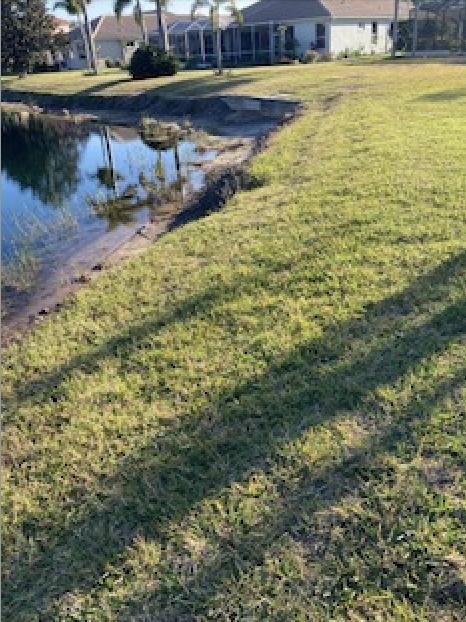


**data_grass_backyard_3PM_shore_at_end.xlsx**
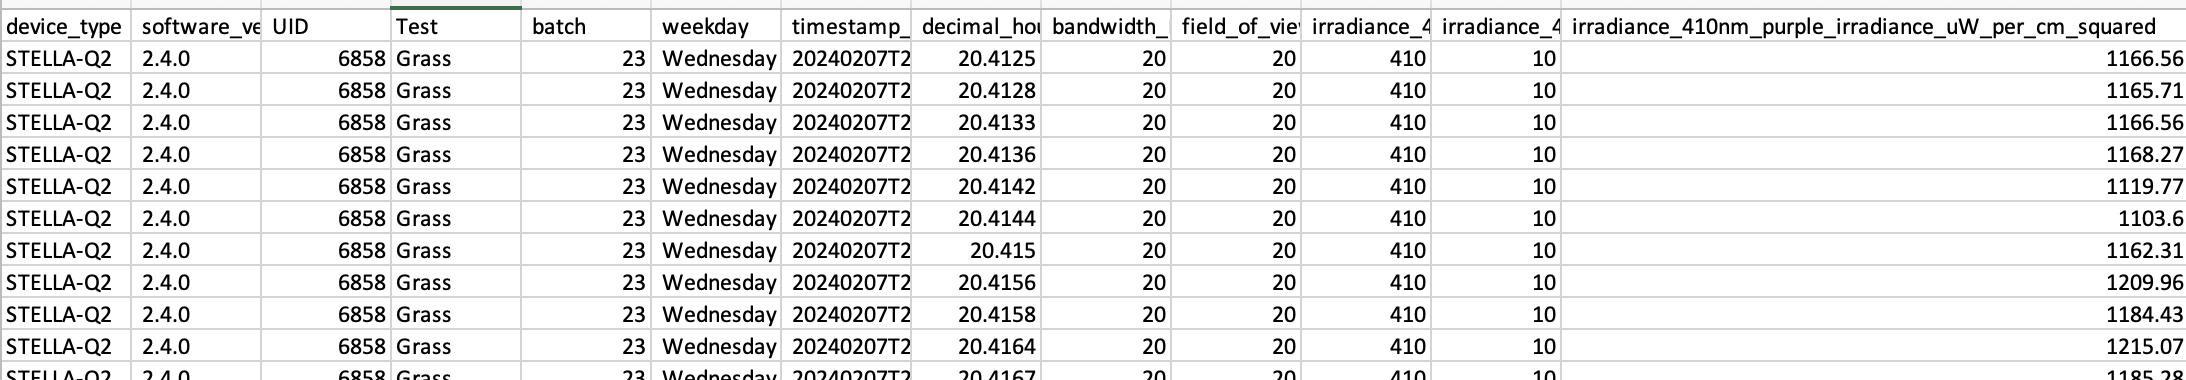


## Read in Excel data file collected on the STELLA-Q2 micro SD card:

In [2]:
#read the file
#file = r'data_test2.xlsx'
#file = r'data_true_colors.xlsx'
#file = r'data_true_colors2.xlsx'
#file = r'data_front_yard_grass_brick.xlsx'
file = r'data_grass_backyard_3PM_shore_at_end.xlsx'
df3 = pd.read_excel(file,index_col=False)
df3.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,Grass,23,Wednesday,20240207T202445Z,20.4125,20,20,...,900,10,1944.88,233.386,940,10,1430.29,171.635,4.17,98
1,STELLA-Q2,2.4.0,6858,Grass,23,Wednesday,20240207T202446Z,20.4128,20,20,...,900,10,1949.33,233.919,940,10,1430.29,171.635,4.17,98
2,STELLA-Q2,2.4.0,6858,Grass,23,Wednesday,20240207T202448Z,20.4133,20,20,...,900,10,1949.33,233.919,940,10,1432.06,171.847,4.17,98
3,STELLA-Q2,2.4.0,6858,Grass,23,Wednesday,20240207T202449Z,20.4136,20,20,...,900,10,1951.00,234.120,940,10,1430.29,171.635,4.16,98
4,STELLA-Q2,2.4.0,6858,Grass,23,Wednesday,20240207T202451Z,20.4142,20,20,...,900,10,1823.19,218.783,940,10,1324.41,158.929,4.17,98


## Explore the data:

In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 84 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   device_type                                                            87 non-null     object 
 1    software_version                                                      87 non-null     object 
 2    UID                                                                   87 non-null     int64  
 3   Test                                                                   87 non-null     object 
 4    batch                                                                 87 non-null     int64  
 5    weekday                                                               87 non-null     object 
 6    timestamp_iso8601                                                     87 non-null     objec

## We did alter the original code.py file on the STELLA-Q2 to use actual color names for the following column data vs. *near IR* as in the original STELLA-Q2 code.py code file.

     49   irradiance_680nm_black_wavelength_nm                                  60 non-null     int64  
     50   irradiance_680nm_black_wavelength_uncertainty_nm                      60 non-null     int64  
     51   irradiance_680nm_black_irradiance_uW_per_cm_squared                   60 non-null     float64
     52   irradiance_680nm_black_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     53   irradiance_705nm_brown_wavelength_nm                                  60 non-null     int64  
     54   irradiance_705nm_brown_wavelength_uncertainty_nm                      60 non-null     int64  
     55   irradiance_705nm_brown_irradiance_uW_per_cm_squared                   60 non-null     float64
     56   irradiance_705nm_brown_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     57   irradiance_730nm_gray_wavelength_nm                                   60 non-null     int64  
     58   irradiance_730nm_gray_wavelength_uncertainty_nm                       60 non-null     int64  
     59   irradiance_730nm_gray_irradiance_uW_per_cm_squared                    60 non-null     float64
     60   irradiance_730nm_gray_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64
     61   irradiance_760nm_silver_wavelength_nm                                 60 non-null     int64  
     62   irradiance_760nm_silver_wavelength_uncertainty_nm                     60 non-null     int64  
     63   irradiance_760nm_silver_irradiance_uW_per_cm_squared                  60 non-null     float64
     64   irradiance_760nm_silver_irradiance_uncertainty_uW_per_cm_squared      60 non-null     float64
     65   irradiance_810nm_lightgray_wavelength_nm                              60 non-null     int64  
     66   irradiance_810nm_lightgray_wavelength_uncertainty_nm                  60 non-null     int64  
     67   irradiance_810nm_lightgray_irradiance_uW_per_cm_squared               60 non-null     float64
     68   irradiance_810nm_lightgray_irradiance_uncertainty_uW_per_cm_squared   60 non-null     float64
     69   irradiance_860nm_linen_wavelength_nm                                  60 non-null     int64  
     70   irradiance_860nm_linen_wavelength_uncertainty_nm                      60 non-null     int64  
     71   irradiance_860nm_linen_irradiance_uW_per_cm_squared                   60 non-null     float64
     72   irradiance_860nm_linen_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     73   irradiance_900nm_wheat_wavelength_nm                                  60 non-null     int64  
     74   irradiance_900nm_wheat_wavelength_uncertainty_nm                      60 non-null     int64  
     75   irradiance_900nm_wheat_irradiance_uW_per_cm_squared                   60 non-null     float64
     76   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     77   irradiance_940nm_gold_wavelength_nm                                   60 non-null     int64  
     78   irradiance_940nm_gold_wavelength_uncertainty_nm                       60 non-null     int64  
     79   irradiance_940nm_gold_irradiance_uW_per_cm_squared                    60 non-null     float64
     80   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64


In [4]:
df3.describe()

,UID,batch,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,irradiance_410nm_purple_wavelength_nm,irradiance_410nm_purple_wavelength_uncertainty_nm,irradiance_410nm_purple_irradiance_uW_per_cm_squared,irradiance_410nm_purple_irradiance_uncertainty_uW_per_cm_squared,irradiance_435nm_blue_wavelength_nm,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
count,87.0,87.0,87.000000,87.0,87.0,87.0,87.0,87.000000,87.000000,87.0,...,87.0,87.0,87.000000,87.000000,87.0,87.0,87.000000,87.000000,87.000000,87.0
mean,6858.0,23.0,20.431131,20.0,20.0,410.0,10.0,1031.773080,123.812713,435.0,...,900.0,10.0,1533.193690,183.983299,940.0,10.0,1128.972828,135.476736,4.160690,98.0
std,0.0,0.0,0.011006,0.0,0.0,0.0,0.0,174.756828,20.970850,0.0,...,0.0,0.0,524.859268,62.983108,0.0,0.0,350.776811,42.093203,0.002549,0.0
min,6858.0,23.0,20.412500,20.0,20.0,410.0,10.0,459.479000,55.137000,435.0,...,900.0,10.0,362.860000,43.543000,940.0,10.0,325.588000,39.070000,4.160000,98.0
25%,6858.0,23.0,20.421800,20.0,20.0,410.0,10.0,972.137500,116.656500,435.0,...,900.0,10.0,1428.100000,171.372000,940.0,10.0,1054.405000,126.529000,4.160000,98.0
50%,6858.0,23.0,20.431100,20.0,20.0,410.0,10.0,1091.690000,131.002000,435.0,...,900.0,10.0,1729.830000,207.580000,940.0,10.0,1249.410000,149.929000,4.160000,98.0
75%,6858.0,23.0,20.440550,20.0,20.0,410.0,10.0,1160.185000,139.222000,435.0,...,900.0,10.0,1907.930000,228.952000,940.0,10.0,1384.410000,166.129000,4.160000,98.0
max,6858.0,23.0,20.450000,20.0,20.0,410.0,10.0,1266.120000,151.934000,435.0,...,900.0,10.0,2138.260000,256.591000,940.0,10.0,1525.580000,183.070000,4.170000,98.0


In [5]:
df3.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,Grass,23,Wednesday,20240207T202445Z,20.4125,20,20,...,900,10,1944.88,233.386,940,10,1430.29,171.635,4.17,98
1,STELLA-Q2,2.4.0,6858,Grass,23,Wednesday,20240207T202446Z,20.4128,20,20,...,900,10,1949.33,233.919,940,10,1430.29,171.635,4.17,98
2,STELLA-Q2,2.4.0,6858,Grass,23,Wednesday,20240207T202448Z,20.4133,20,20,...,900,10,1949.33,233.919,940,10,1432.06,171.847,4.17,98
3,STELLA-Q2,2.4.0,6858,Grass,23,Wednesday,20240207T202449Z,20.4136,20,20,...,900,10,1951.00,234.120,940,10,1430.29,171.635,4.16,98
4,STELLA-Q2,2.4.0,6858,Grass,23,Wednesday,20240207T202451Z,20.4142,20,20,...,900,10,1823.19,218.783,940,10,1324.41,158.929,4.17,98


In [6]:
# Remove leading/trailing whitespaces in column names
df3.columns = df3.columns.str.strip()

## Plot Battery Voltage Level:

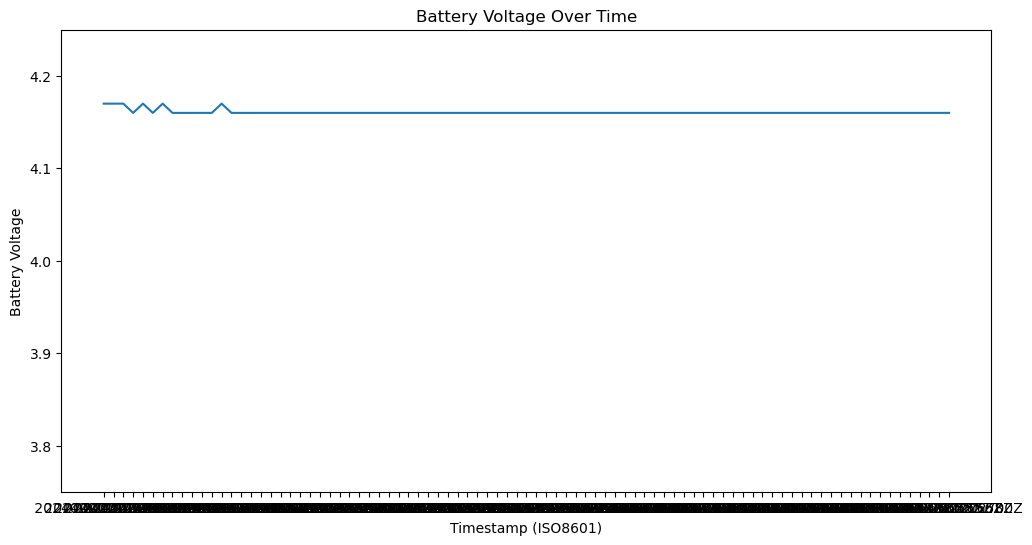

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df3['timestamp_iso8601'], df3['battery_voltage'])
plt.ylim(3.75,4.25)
plt.xlabel('Timestamp (ISO8601)')
plt.ylabel('Battery Voltage')
plt.title('Battery Voltage Over Time')
plt.show()


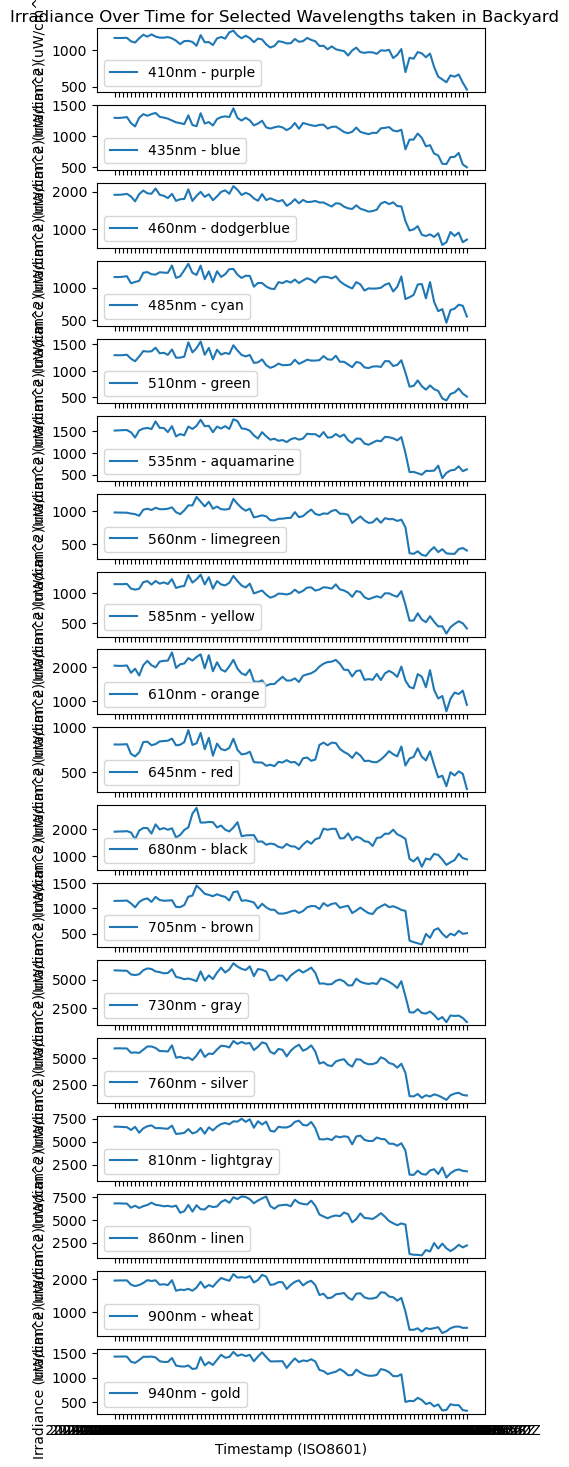

In [8]:
# List of wavelengths for plotting
#wavelengths_to_plot = [410, 435, 450, 485, 510, 535, 560, 585, 610, 645, 680]
wavelengths_to_plot= [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]

# Create subplots
fig, axs = plt.subplots(len(wavelengths_to_plot), 1, figsize=(5, 1 * len(wavelengths_to_plot)), sharex=True)

# Loop through each wavelength and plot the data
for i, wavelength in enumerate(wavelengths_to_plot):
    # Use regex to match column names containing the wavelength
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in df3.columns if re.search(wavelength_pattern, col)]
    
    # Plot the data for each matched column
    for column in wavelength_columns:
        color = re.search(wavelength_pattern, column).group(1)
        axs[i].plot(df3['timestamp_iso8601'], df3[column], label=f'{wavelength}nm - {color}')

    axs[i].set_ylabel('Irradiance (uW/cm^2)')
    axs[i].legend()

# Set common xlabel and title
plt.xlabel('Timestamp (ISO8601)')
plt.suptitle('Irradiance Over Time for Selected Wavelengths taken in Backyard', y=0.89)

# Show the plot
plt.show()


## The shoreline at the end has lower Irradiance than the grass, especially in the near IR regions.

In [9]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df3.columns))))

Test = df3['Test']

#def update_plot(timestamp_index, batch_index):
def update_plot(timestamp_index):
    
    #print(timestamp_index)
    
    plt.figure(figsize=(12, 6))

    #timestamp = df3['timestamp_iso8601'][timestamp_index]
    timestamp = timestamp_index
    #test = df3['Test'][Test]
    test = df3['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df3.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Map custom colors to standard recognized color names
            # color = map_color(color)

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df3.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df3.columns:
                wavelength_data = df3[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df3[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df3[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df3[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                             linestyle='', marker='o', markersize=5, capsize=5, color=color)

                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')


    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.xlim(350,1000)
    plt.ylim(0,14000)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f"Irradiance Over Wavelength by Timestamp {timestamp} and Batch {batch_index}: \n Test Pattern {df3['Test']}")
    #plt.title(f"Irradiance Over Wavelength for Backyard Readings {timestamp}: \n \n Test Pattern {df3['Test']}")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df3['Test']}")

    
    
#timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df3) - 1, step=1, description='Timestamp Index')
timestamp_slider = widgets.IntSlider(value=0 , min=0, max=len(df3)-1 , step=1, description='Pattern#', continuous_update=True, orientation='horizontal')#,
    #readout=True)#,
    #readout_format='d')

batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Pattern#', max=86), Output()), _dom_classes=('widget-int…

In [10]:
def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = timestamp_index

    wavelength_data_list = []
    irradiance_data_list = []
    
    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df3.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Check if the column exists before using it
            if column in df3.columns:
                # Extract wavelength data
                wavelength_data_str = wavelength
                try:
                    wavelength_data = int(wavelength_data_str)  # Convert string to integer
                except ValueError:
                    try:
                        wavelength_data = float(wavelength_data_str)  # Convert string to float
                    except ValueError:
                        continue  # Skip if wavelength cannot be converted to int or float

                # Append data to lists
                wavelength_data_list.append(wavelength_data)
                irradiance_data_list.append(df3[column][timestamp_index])
                
    # Plot data points
    plt.plot(wavelength_data_list, irradiance_data_list, linestyle='-', marker = 'o',markersize = 10, markeredgecolor = 'black', mfc = 'k', linewidth = 4,color='red')

   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')
            
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    plt.ylim(0,14000)    
    plt.grid()
    plt.title(f"Raw Readings Irradiance Over Wavelength by Test Pattern {timestamp}: \n \n Test Pattern {df3['Test']}")

# Create a slider widget
timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df3) - 1, step=1, description='Timestamp Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=86), Output()), _dom_classes=('wid…

## All Backyard Grass and Shoreline samples:

Timestamp not implemented yet.

In [11]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df3.columns))))

# Function to update the plot based on selected timestamp
def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df3['timestamp_iso8601'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df3.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = re.search(wavelength_pattern, column).group(1)

            wavelength_data = df3[f'irradiance_{wavelength}nm_{color}_wavelength_nm']
            irradiance_data = df3[column]
            wavelength_uncertainty = df3[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm']
            irradiance_uncertainty = df3[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared']

            plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,color=color,
                         label=f'{wavelength}nm - {color}', linestyle='', marker='o', markersize=3, capsize=3)

   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')
           
            
            
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    plt.ylim(0,14000)    
 
    plt.grid()
    #plt.title(f'Irradiance Over Wavelength - {timestamp}')
    plt.title(f"Raw Readings Irradiance Over Wavelength for all Backyard Readings {timestamp_index}: \n \n Test Pattern {df3['Test']}")


# Create a slider widget
timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df3) - 1, step=1, description='Timestamp Index',disabled=True,)

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', disabled=True, max=86), Output()), _do…

---
---
---
# **Now we will apply Normalization to our data per recommendations from Paul Mirel.**

## Load White Standard data taken in same lighting conditions:

### Email from Paul Mirel of NASA, February 5, 2024: 
    It’s general practice to measure a white reference in the same illumination as the sample, and then to measure the sample. The unitless reflectance from the sample is then the sample signal divided by the white reference signal, in each wavelength. Landsat uses a stretch of desert sand, or a huge white tarp!, as a reference. Spectralon is the material of choice for white references, but it’s expensive. We get quite good results with ordinary white Styrofoam (without cover sheets), and are considering using white playground sand, or a plain white felt acrylic blanket. The goal is a material that scatters light equally in all directions, and does not have much, or any, specular shiny reflectance.


## Extract white reading (first reading) and then calibrate all readings to this white card reading:

In [12]:
#read the file
file = r'white_sunny_Feb9.xlsx'
white = pd.read_excel(file,index_col=False)

# Remove leading/trailing whitespaces in column names
white.columns = white.columns.str.strip()
white.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,White Card,1,Friday,20240209T193027Z,19.501908,20,20,...,900,10,5487.67,658.520346,940,10,3653.816154,438.457769,4.16,98


In [13]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))


def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = white['timestamp_iso8601'][timestamp_index]
    test = white['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Map custom colors to standard recognized color names
            # color = map_color(color)

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
                wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = white[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = white[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                             linestyle='', marker='o', markersize=5, capsize=5, color=color)

                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')


    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.xlim(350,1000)
    #plt.ylim(0,30)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f'Irradiance Over Wavelength by Timestamp {timestamp} for White Standard')
    plt.title(f"Raw White Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {white['Test']}")


timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(white) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=0), Output()), _dom_classes=('widg…

**In the above plot for our white standard, there is quite a range of magnitudes across the specrtum. This could be instrument bias.**

## Calculate Scaling Factor per Wavelength:

In [14]:
# Extract the white standard readings from the DataFrame

# Initialize white_standard_readings as an empty dictionary
white_standard_readings = {}

# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))

timestamp = white['timestamp_iso8601'][0]

for wavelength in wavelengths:
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

    for column in wavelength_columns:
        color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
        if wavelength == '410':
            color = 'purple'
        elif wavelength == '435':
            color = 'blue'
        elif wavelength == '460':
            color = 'dodgerblue'
        elif wavelength == '485':
            color = 'cyan'
        elif wavelength == '510':
            color = 'green'
        elif wavelength == '535':
            color = 'aqumarine'
        elif wavelength == '560':
            color = 'limegreen'
        elif wavelength == '585':
            color = 'yellow'
        elif wavelength == '610':
            color = 'orange'
        elif wavelength == '645':
            color = 'red'
        elif wavelength == '680':
            color = 'black'
        elif wavelength == '705':
            color = 'brown'
        elif wavelength == '730':
            color = 'gray'
        elif wavelength == '760':
            color = 'silver'
        elif wavelength == '810':
            color = 'lightgray'
        elif wavelength == '860':
            color = 'linen'
        elif wavelength == '900':
            color = 'wheat'
        elif wavelength == '940':
            color = 'gold'

        # Map custom colors to standard recognized color names
        # color = map_color(color)

        # Check if the column exists before using it
        if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
            #wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][0]
            #irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_reading = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_standard_readings[wavelength] = white_reading
            
    #print()
    #print('1) This is the raw white card readings from our white card calibration:',white_reading, 'at', wavelength,'nm.')
  
    #print()
    #print('2) These are our white card standard wavelengths and readings from our spectrometer:',white_standard_readings,'used with wavelength', wavelength,'nm.')



# Calculate scaling factors using only white standard readings
scaling_factors = {}
for wavelength, white_reading in white_standard_readings.items():
    # Assuming the minimum possible reading is zero
    scaling_factor = 1.0 / white_reading
    scaling_factors[wavelength] = scaling_factor

    
    
#print()
#print('3) These are our wavelengths and white scaling factors:',scaling_factors)

# Print scaling factors
print()
print("Scaling Factors:")
for wavelength, factor in scaling_factors.items():
    print(f"4) These are our final wavelength and scaling factors per wavelength {wavelength}nm: {factor}")

    
#print([scaling_factors[factor] for wavelength in wavelengths])    


Scaling Factors:
4) These are our final wavelength and scaling factors per wavelength 410nm: 8.814966728586158e-05
4) These are our final wavelength and scaling factors per wavelength 435nm: 5.252377761513363e-05
4) These are our final wavelength and scaling factors per wavelength 460nm: 4.340052457880208e-05
4) These are our final wavelength and scaling factors per wavelength 485nm: 4.635669371936334e-05
4) These are our final wavelength and scaling factors per wavelength 510nm: 5.007232562264456e-05
4) These are our final wavelength and scaling factors per wavelength 560nm: 8.129872842534995e-05
4) These are our final wavelength and scaling factors per wavelength 585nm: 8.112992770699367e-05
4) These are our final wavelength and scaling factors per wavelength 610nm: 3.3665695756633266e-05
4) These are our final wavelength and scaling factors per wavelength 645nm: 9.884329019812148e-05
4) These are our final wavelength and scaling factors per wavelength 680nm: 3.835187818735453e-05
4

## After White Card Correction where first sample is the White Calibration Card data:

In [15]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df3.columns))))

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df3['timestamp_iso8601'][timestamp_index]
    test = df3['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df3.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df3.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df3.columns:
                wavelength_data = df3[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df3[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df3[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df3[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Apply scaling factor to correct irradiance data
                scaling_factor = scaling_factors[wavelength]
                #print(scaling_factor)
                corrected_irradiance_data = irradiance_data * scaling_factor

                
                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = corrected_irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                #plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                #             linestyle='', marker='o', markersize=5, capsize=5, color=color)
                plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty*scaling_factor,
                              linestyle='', marker='o', markersize=5, capsize=5, color=color)

                
                
                
                # Plot data point with error bars (same as before)
                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')


    # Display the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Corrected Irradiance (uW/cm^2)')  # Updated ylabel to reflect correction
    plt.xlim(350,1000)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f'White Card Corrected Irradiance Over Wavelength by Grass Reading {test} for Backyard')
    plt.title(f"Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df3['Test']}")




                  

timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df3) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=86), Output()), _dom_classes=('wid…

## Qc White Card Correction Factors being used

In [17]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df3.columns))))

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df3['timestamp_iso8601'][timestamp_index]
    test = df3['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df3.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df3.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df3.columns:
                wavelength_data = df3[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df3[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df3[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df3[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Apply scaling factor to correct irradiance data
                scaling_factor = scaling_factors[wavelength]
                print('Scaling Factor(', scaling_factor, ') x Reading (',irradiance_data, ')=',round(scaling_factor*irradiance_data,2), 'as a unitless calibrated reading')
                corrected_irradiance_data = irradiance_data * scaling_factor

                
                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = corrected_irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                #plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                #             linestyle='', marker='o', markersize=5, capsize=5, color=color)
                plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty*scaling_factor,
                              linestyle='', marker='o', markersize=5, capsize=5, color=color)

                
                
                
                # Plot data point with error bars (same as before)
                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')




    # Display the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Corrected Irradiance (uW/cm^2)')  # Updated ylabel to reflect correction
    plt.xlim(350,1000)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    plt.title(f"Qc (look at printout of scaling factors) of White Card Corrected Irradiance Over Wavelength by Grass Reading '{test}' from Backyard")
    #plt.title(f"Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {grass['Test']}")




                  

timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df3) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=86), Output()), _dom_classes=('wid…